## Goal of this Notebook
1. Find the conditional probability of a movement given the previous day's movement
2. Repeat with the other stocks and find the average movement given the previous day
3. Create a few visuals (bar charts)

For the simple strategies, let's do all possible "observe one day, predict the second day" scenarios.

For example:  
big drop, ?  
small gain, ?  
big gain, ?  
...  

The returned value should be a probability distribution of the different categories

In [1]:
from stock_utils import *

In [2]:
df = pd.DataFrame()
df = df.from_csv('stock_data/nvda.csv')
daily_movements = get_price_movements(df)

In [3]:
np.mean(daily_movements)

0.11206513230639878

In [4]:
np.std(daily_movements)

3.062208174713819

In [5]:
def categorize_movements(movements):
    """Given an array of movements, return an array of categories based on how relatively large the movements are"""
    mu, sigma = np.mean(movements), np.std(movements)
    categories = []
    
    for i in range(len(movements)):
        if (movements[i] <= (mu - 2*sigma)):
            categories.append('vbd') ## very big drop
        elif (movements[i] <= (mu - sigma)):
            categories.append('bd')  ## big drop
        elif (movements[i] <= (mu - sigma/2)):
            categories.append('md')  ## medium drop
        elif (movements[i] < mu):
            categories.append('sd')  ## small drop
        elif (movements[i] >= (mu + 2*sigma)):
            categories.append('vbg') ## very big gain
        elif (movements[i] >= (mu + sigma)):
            categories.append('bg')  ## big gain
        elif (movements[i] >= (mu + sigma/2)):
            categories.append('mg')  ## medium gain
        elif (movements[i] >= mu):
            categories.append('sg')  ## small gain
        else:
            print("didn't fit")
    
    return categories
        

In [6]:
def count_movement_category(categories, cat_to_count):
    """Given a list of categories, return a count of a specific category"""
    count = 0
    for i in range(len(categories)):
        if categories[i] == cat_to_count:
            count = count + 1
    return count

In [7]:
def count_trends(trends, trend_to_count):
    """Given a list of trends, return a count of a specific trend"""
    count = 0
    for i in range(len(trends)):
        if trends[i] == trend_to_count:
            count = count + 1
    return count

In [8]:
categories = categorize_movements(daily_movements)

#### First let's try looking ahead only one timestep
We can add a period variable later on to generalize.

In [9]:
vbd_count = count_movement_category(categories, 'vbd')
bd_count = count_movement_category(categories, 'bd')
md_count = count_movement_category(categories, 'md')
sd_count = count_movement_category(categories, 'sd')
sg_count = count_movement_category(categories, 'sg')
mg_count = count_movement_category(categories, 'mg')
bg_count = count_movement_category(categories, 'bg')
vbg_count = count_movement_category(categories, 'vbg')
total_cat_count = len(categories)

In [10]:
p_vbd = vbd_count / total_cat_count
p_bd = bd_count / total_cat_count
p_md = md_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_mg = mg_count / total_cat_count
p_bg = bg_count / total_cat_count
p_vbg = vbd_count / total_cat_count

In [11]:
cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]

In [12]:
cat_probs

[0.024206349206349207,
 0.08055555555555556,
 0.13214285714285715,
 0.26904761904761904,
 0.2619047619047619,
 0.12857142857142856,
 0.07777777777777778,
 0.024206349206349207]

In [13]:
def get_two_day_trends(categories):
    two_day_trends = []
    for i in range(len(categories) - 1):
        two_day_trends.append(categories[i] + '_' + categories[i+1])
    return two_day_trends

How can we tell if this has any predictive value? If having information of what happened the previous day can help us better predict what will happen tomorrow.  
By the definition of independent events, if P(category | previous category) != P(category)

In [14]:
two_day_trends = get_two_day_trends(categories)

In [15]:
two_day_trends[1:10]

['vbd_bg',
 'bg_sd',
 'sd_bg',
 'bg_mg',
 'mg_sd',
 'sd_sg',
 'sg_bd',
 'bd_sg',
 'sg_mg']

In [16]:
## Lets say a medium sized gain was observed today. What is the augmented probability of all events tomorrow?
## Formally, we want P(X2=x|X1='g'), which is P(X1='g' AND X2=x) / P(X1='g')
mg_vbd_count = count_trends(two_day_trends, 'mg_vbd')
mg_bd_count = count_trends(two_day_trends, 'mg_bd')
mg_md_count = count_trends(two_day_trends, 'mg_md')
mg_sd_count = count_trends(two_day_trends, 'mg_sd')
mg_sg_count = count_trends(two_day_trends, 'mg_sg')
mg_mg_count = count_trends(two_day_trends, 'mg_mg')
mg_bg_count = count_trends(two_day_trends, 'mg_bg')
mg_vbg_count = count_trends(two_day_trends, 'mg_vbg')

p_mg_vbd = mg_vbd_count / mg_count
p_mg_bd = mg_bd_count / mg_count
p_mg_md = mg_md_count / mg_count
p_mg_sd = mg_sd_count / mg_count
p_mg_sg = mg_sg_count / mg_count
p_mg_mg = mg_mg_count / mg_count
p_mg_bg = mg_bg_count / mg_count
p_mg_vbg = mg_vbg_count / mg_count

mg_x_probs = [p_mg_vbd, p_mg_bd, p_mg_md, p_mg_sd, p_mg_sg, p_mg_mg, p_mg_bg, p_mg_vbg]
print('sum is ' + str(sum(mg_x_probs)) + '. (Just a check)')

sum is 1.0. (Just a check)


In [17]:
cat_probs

[0.024206349206349207,
 0.08055555555555556,
 0.13214285714285715,
 0.26904761904761904,
 0.2619047619047619,
 0.12857142857142856,
 0.07777777777777778,
 0.024206349206349207]

In [18]:
mg_x_probs

[0.033950617283950615,
 0.09259259259259259,
 0.13580246913580246,
 0.27469135802469136,
 0.22530864197530864,
 0.10185185185185185,
 0.10185185185185185,
 0.033950617283950615]

What is the difference between knowing a given day vs. a given day following a day of medium gains?

In [19]:
[print(str(100 * (mg_x_probs[i] - cat_probs[i]))) for i in range(len(cat_probs))]

0.9744268077601408
1.2037037037037026
0.36596119929453164
0.5643738977072321
-3.6596119929453277
-2.671957671957671
2.4074074074074066
0.9744268077601408


[None, None, None, None, None, None, None, None]

We can see, at least with this stock, a momentum and pullback effect exists. The probability of big gains is increased, but so is the probability of big losses.

In [20]:
## Lets look at effects after each category of day
all_categories = ['vbd', 'bd', 'md', 'sd', 'sg', 'mg', 'bg', 'vbg']

for cat in all_categories:
    print('Category: ' + cat)
    cat_count = count_movement_category(categories, cat)
    print('Total Count: ' + str(cat_count))
    two_day_probs = []
    
    ## Get all two day counts
    for next_day in all_categories:
        two_day_name = cat + '_' + next_day
        two_day_count = count_trends(two_day_trends, two_day_name)
        two_day_prob = two_day_count / cat_count
        two_day_probs.append(two_day_prob)
    print('Probabilities:')
    print(two_day_probs)
    print()
    
print('Regular probabilities: ')
print(cat_probs)

Category: vbd
Total Count: 61
Probabilities:
[0.06557377049180328, 0.16393442622950818, 0.13114754098360656, 0.16393442622950818, 0.13114754098360656, 0.13114754098360656, 0.14754098360655737, 0.06557377049180328]

Category: bd
Total Count: 203
Probabilities:
[0.054187192118226604, 0.11330049261083744, 0.1330049261083744, 0.20689655172413793, 0.2512315270935961, 0.09852216748768473, 0.07881773399014778, 0.06403940886699508]

Category: md
Total Count: 333
Probabilities:
[0.021021021021021023, 0.09309309309309309, 0.12612612612612611, 0.22822822822822822, 0.2552552552552553, 0.15915915915915915, 0.09009009009009009, 0.02702702702702703]

Category: sd
Total Count: 678
Probabilities:
[0.016224188790560472, 0.05752212389380531, 0.12979351032448377, 0.29056047197640117, 0.29793510324483774, 0.12094395280235988, 0.06932153392330384, 0.016224188790560472]

Category: sg
Total Count: 660
Probabilities:
[0.006060606060606061, 0.06515151515151515, 0.13787878787878788, 0.31212121212121213, 0.280303

## Visuals

In [21]:
plt.figure(figsize=(11,4))
categories = ('Very Big Drop', 'Big Drop', 'Medium Drop', 'Small Drop', 'Small Gain', 'Medium Gain', 'Big Gain', 'Very Big Gain')
ind = np.arange(8)
width = 0.5
p1 = plt.bar(ind, cat_probs, width, color='b', align='center')
plt.ylabel('Probabilities')
plt.title('Probabilities of each Category on any given day')
plt.xticks(ind, categories)

([<matplotlib.axis.XTick at 0x115def668>,
 <a list of 8 Text xticklabel objects>)

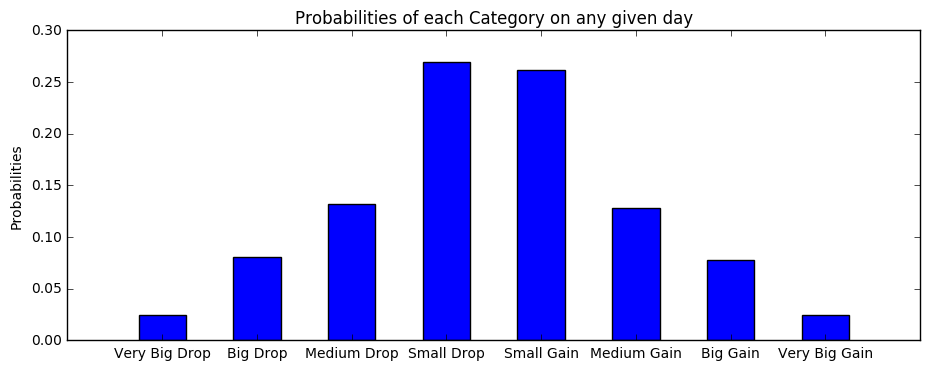

In [22]:
plt.show()

In [23]:
def plot_probability_bar_graph(cat_name, cat_count, two_day_trends, show_baseline=True):
    two_day_probs = []
    all_categories = ['vbd', 'bd', 'md', 'sd', 'sg', 'mg', 'bg', 'vbg']
    category_full_names = {'vbd':'very big drop', 'bd':'big drop', 'md':'medium drop', 'sd':'small drop',
                           'vbg':'very big gain', 'bg':'big gain', 'mg':'medium gain', 'sg':'small gain'}
    for next_day in all_categories:
        two_day_name = cat_name +'_' + next_day
        two_day_count = count_trends(two_day_trends, two_day_name)
        two_day_prob = two_day_count / cat_count
        two_day_probs.append(two_day_prob)

    plt.figure(figsize=(11,4))
    categories = ('Very Big Drop', 'Big Drop', 'Medium Drop', 'Small Drop', 'Small Gain', 'Medium Gain', 'Big Gain', 'Very Big Gain')
    ind = np.arange(8)
    width = 0.25
    if (show_baseline):
        orig_pl = plt.bar(ind+width, cat_probs, width, color='b', label='Original')
    conditioned_pl = plt.bar(ind, two_day_probs, width, color='r', label='After a ' + category_full_names[cat_name])
    plt.ylabel('Probabilities')
    plt.title('Probabilities of each Category')
    plt.xticks(ind+width, categories)
    plt.legend()
    plt.show()

### Probabilities after a very big drop

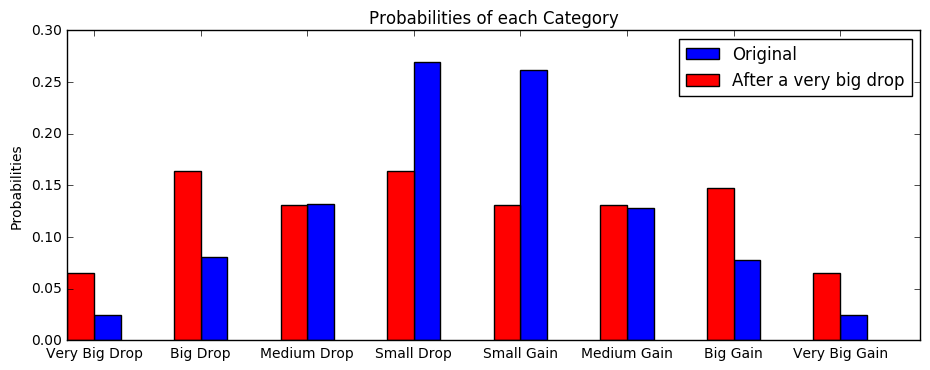

In [24]:
plot_probability_bar_graph('vbd', vbd_count, two_day_trends)

### Probabilities after a big drop

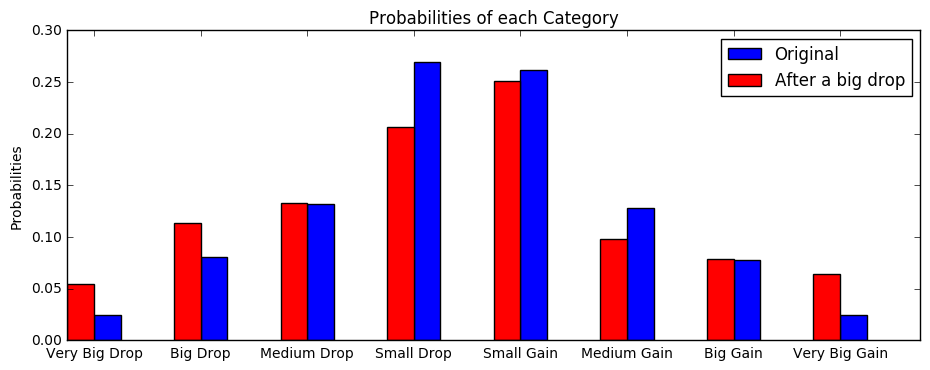

In [25]:
plot_probability_bar_graph('bd', bd_count, two_day_trends)

### Probabilities after a medium drop

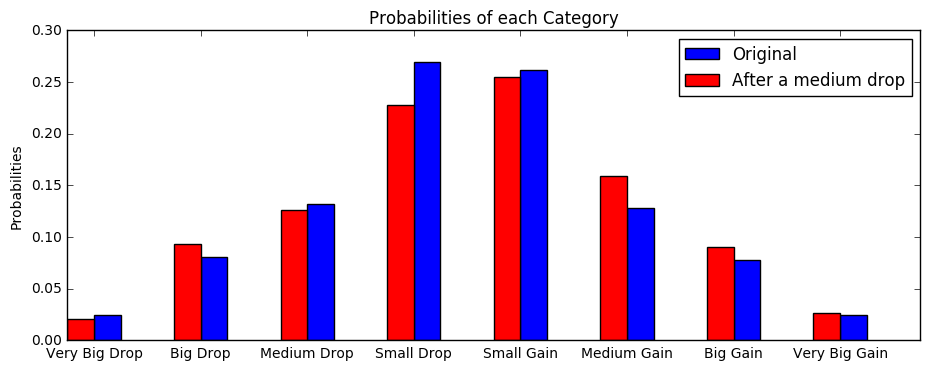

In [26]:
plot_probability_bar_graph('md', md_count, two_day_trends)

### Probabilities after a small drop

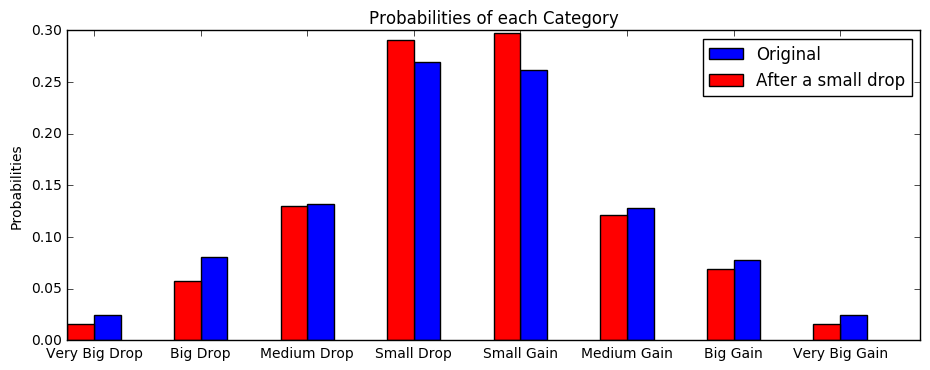

In [27]:
plot_probability_bar_graph('sd', sd_count, two_day_trends)

### Probabilities after a small gain

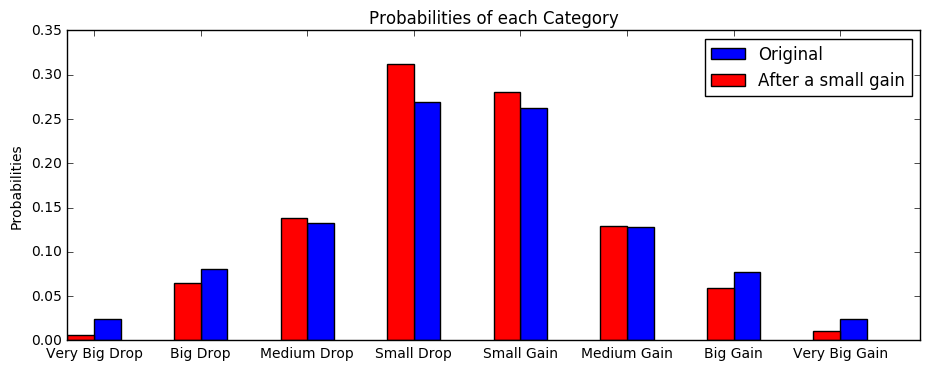

In [28]:
plot_probability_bar_graph('sg', sg_count, two_day_trends)

### Probabilities after a medium gain

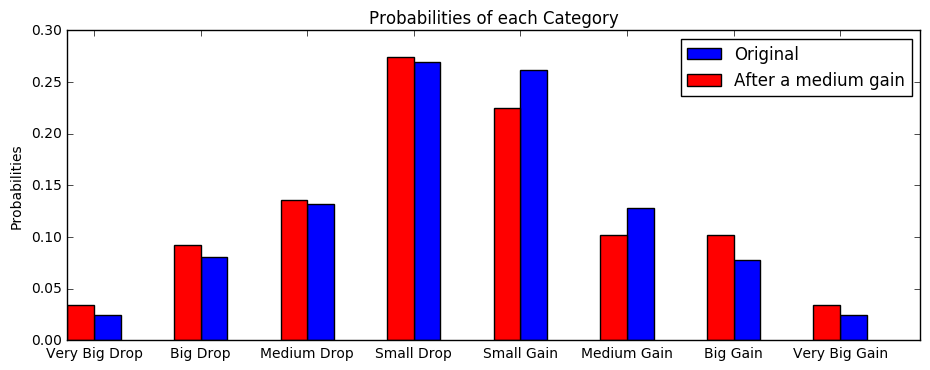

In [29]:
plot_probability_bar_graph('mg', mg_count, two_day_trends)

### Probabilities after a big gain

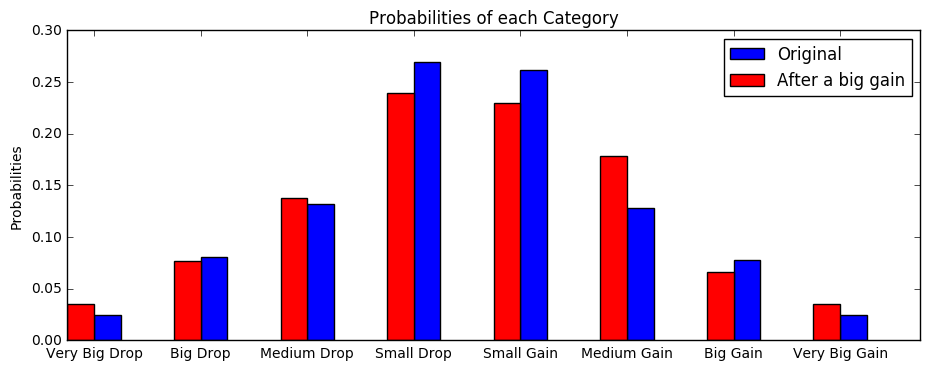

In [30]:
plot_probability_bar_graph('bg', bg_count, two_day_trends)

### Probabilities after a very big gain

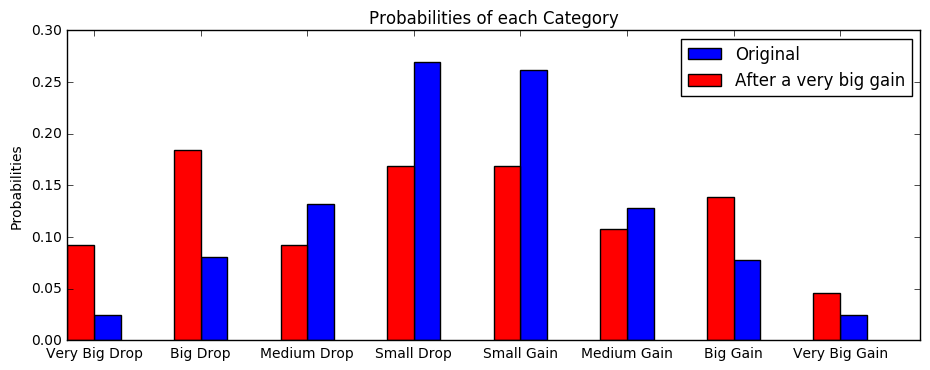

In [31]:
plot_probability_bar_graph('vbg', vbg_count, two_day_trends)

## Let's look at one other stock before we take the average over these stocks

In [32]:
df = pd.DataFrame()
df = df.from_csv('stock_data/bac.csv')
daily_movements = get_price_movements(df)

In [33]:
categories = categorize_movements(daily_movements)

In [34]:
vbd_count = count_movement_category(categories, 'vbd')
bd_count = count_movement_category(categories, 'bd')
md_count = count_movement_category(categories, 'md')
sd_count = count_movement_category(categories, 'sd')
sg_count = count_movement_category(categories, 'sg')
mg_count = count_movement_category(categories, 'mg')
bg_count = count_movement_category(categories, 'bg')
vbg_count = count_movement_category(categories, 'vbg')
total_cat_count = len(categories)

In [35]:
p_vbd = vbd_count / total_cat_count
p_bd = bd_count / total_cat_count
p_md = md_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_mg = mg_count / total_cat_count
p_bg = bg_count / total_cat_count
p_vbg = vbd_count / total_cat_count

In [36]:
cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]

In [37]:
cat_probs

[0.021040095275903135,
 0.04962286621675268,
 0.10877332274712187,
 0.3350535926955141,
 0.3112346169114728,
 0.10599444223898373,
 0.04684398570861453,
 0.021040095275903135]

In [38]:
two_day_trends = get_two_day_trends(categories)

In [39]:
two_day_trends[1:10]

['md_sg',
 'sg_sd',
 'sd_sg',
 'sg_sg',
 'sg_md',
 'md_sd',
 'sd_sd',
 'sd_sd',
 'sd_sg']

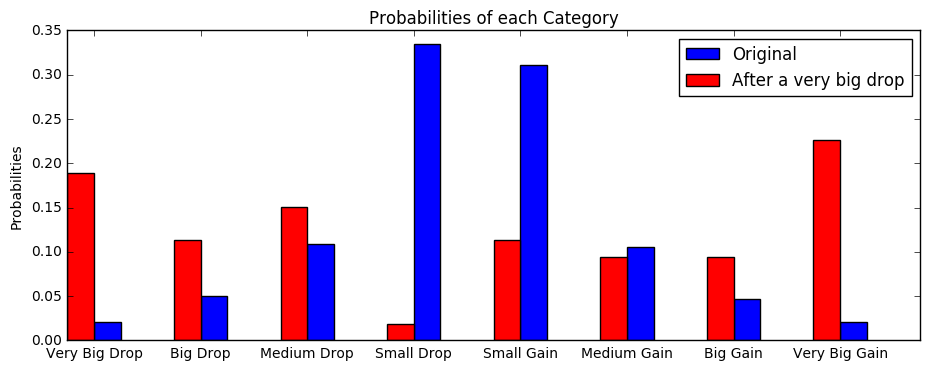

In [40]:
plot_probability_bar_graph('vbd', vbd_count, two_day_trends)

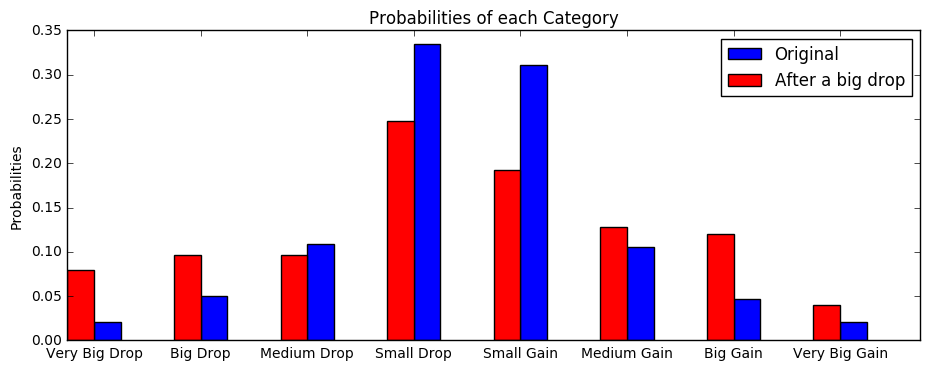

In [41]:
plot_probability_bar_graph('bd', bd_count, two_day_trends)

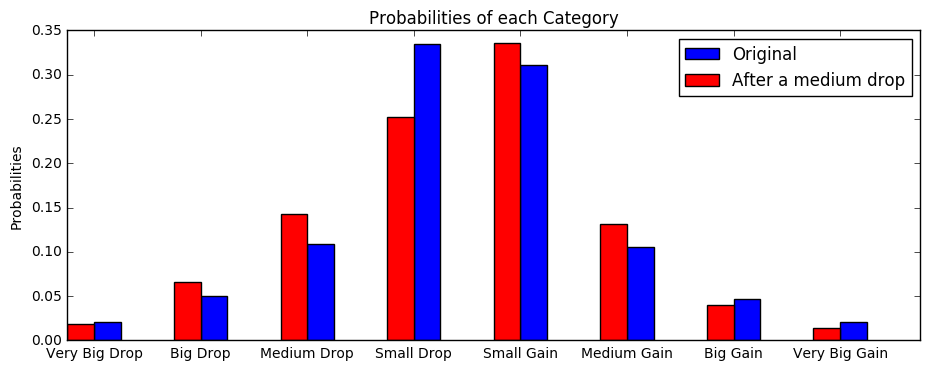

In [42]:
plot_probability_bar_graph('md', md_count, two_day_trends)

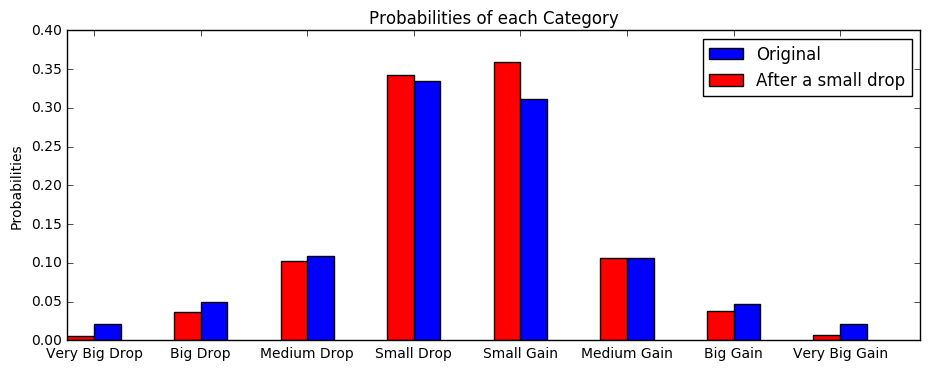

In [43]:
plot_probability_bar_graph('sd', sd_count, two_day_trends)

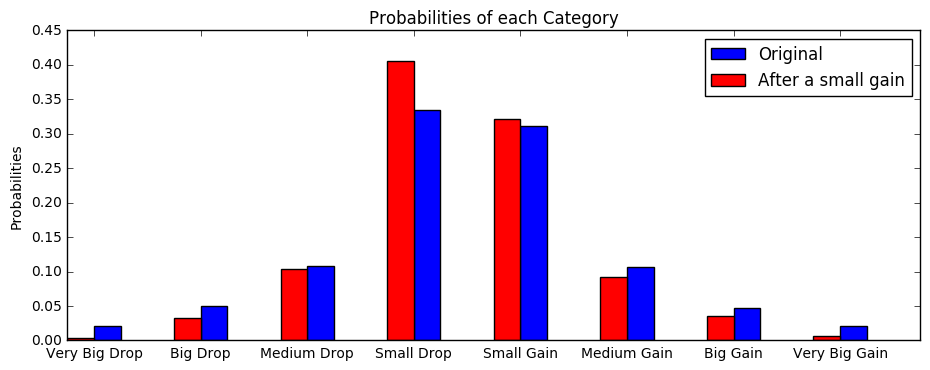

In [44]:
plot_probability_bar_graph('sg', sg_count, two_day_trends)

It looks like small movements are likely to rebound in the other direction with a similar magnitude the next day

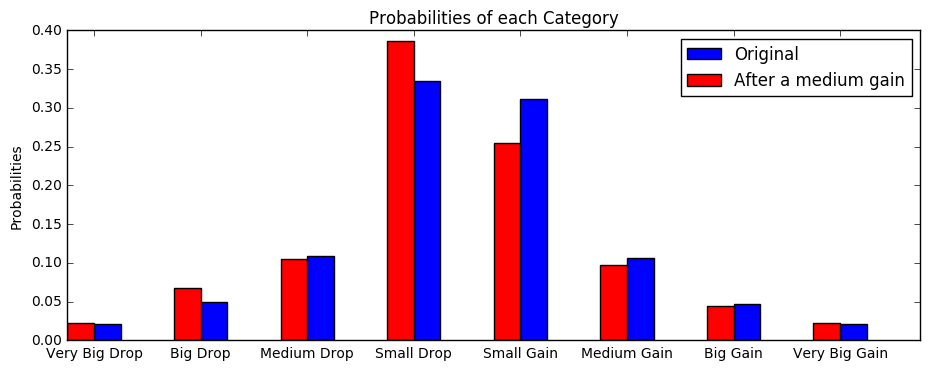

In [45]:
plot_probability_bar_graph('mg', mg_count, two_day_trends)

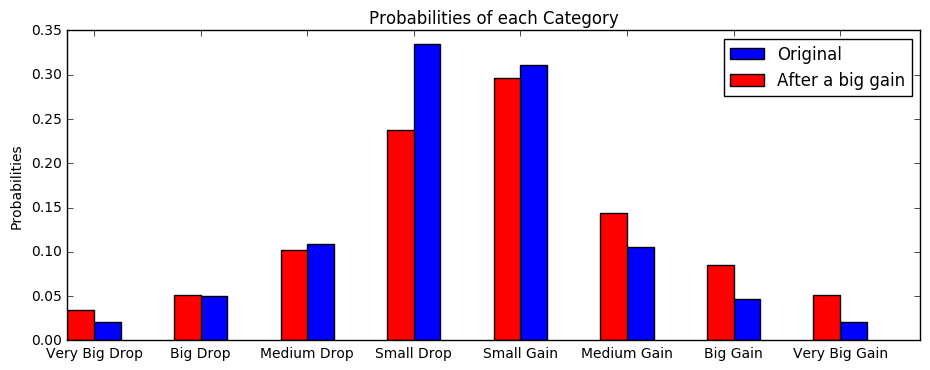

In [46]:
plot_probability_bar_graph('bg', bg_count, two_day_trends)

With BAC, it seems big gains tend to come with strong momentum

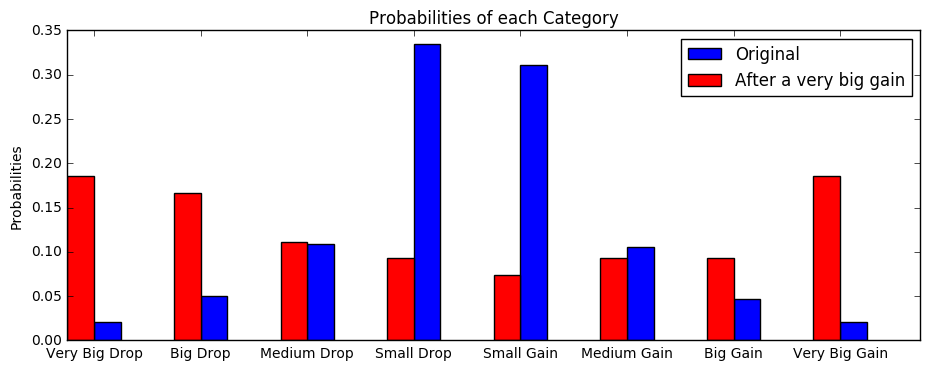

In [47]:
plot_probability_bar_graph('vbg', vbg_count, two_day_trends)

## All stocks
(that are in our stock_data folder)

In [48]:
g = glob.glob('stock_data/*.csv')

all_daily_movements = []
all_categories = []
all_two_day_trends = []

vbd_count = 0
bd_count = 0
md_count = 0
sd_count = 0
sg_count = 0
mg_count = 0
bg_count = 0
vbg_count = 0
total_cat_count = 0

for i in range(len(g)):
    df = pd.DataFrame()
    df = df.from_csv(g[i])
    daily_movements = get_price_movements(df)
    categories = categorize_movements(daily_movements)
    
    all_daily_movements.extend(daily_movements)
    all_categories.extend(categories)
    
    vbd_count += count_movement_category(categories, 'vbd')
    bd_count += count_movement_category(categories, 'bd')
    md_count += count_movement_category(categories, 'md')
    sd_count += count_movement_category(categories, 'sd')
    sg_count += count_movement_category(categories, 'sg')
    mg_count += count_movement_category(categories, 'mg')
    bg_count += count_movement_category(categories, 'bg')
    vbg_count += count_movement_category(categories, 'vbg')
    total_cat_count += len(categories)
    
    two_day_trends = get_two_day_trends(categories)
    all_two_day_trends.extend(two_day_trends)

    
p_vbd = vbd_count / total_cat_count
p_bd = bd_count / total_cat_count
p_md = md_count / total_cat_count
p_sd = sd_count / total_cat_count
p_sg = sg_count / total_cat_count
p_mg = mg_count / total_cat_count
p_bg = bg_count / total_cat_count
p_vbg = vbd_count / total_cat_count

cat_counts = [vbd_count, bd_count, md_count, sd_count, sg_count, mg_count, bg_count, vbg_count]
cat_probs = [p_vbd, p_bd, p_md, p_sd, p_sg, p_mg, p_bg, p_vbg]

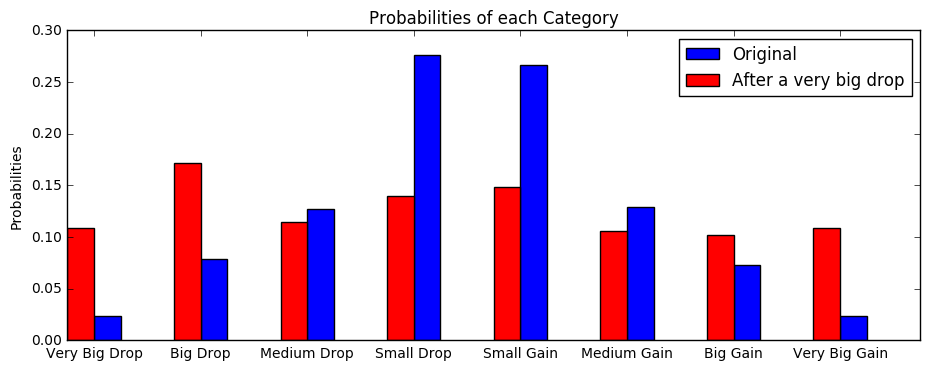

In [49]:
plot_probability_bar_graph('vbd', vbd_count, all_two_day_trends)

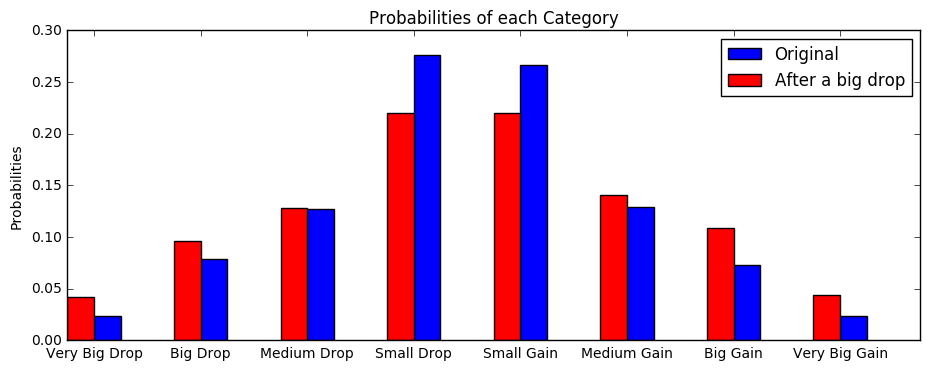

In [50]:
plot_probability_bar_graph('bd', bd_count, all_two_day_trends)

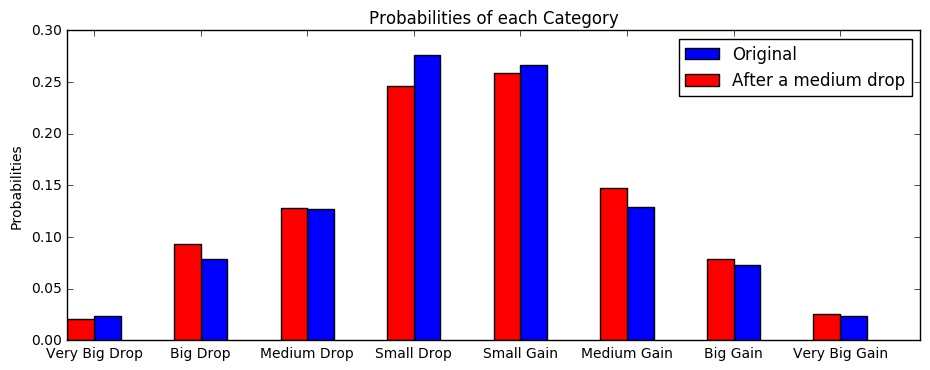

In [51]:
plot_probability_bar_graph('md', md_count, all_two_day_trends)

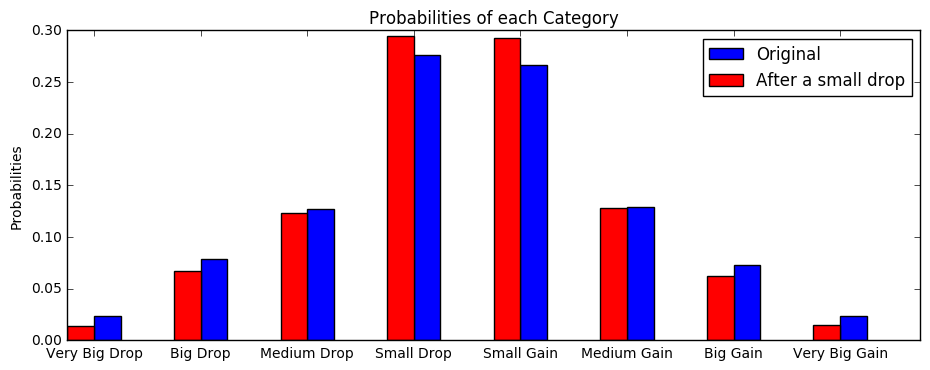

In [52]:
plot_probability_bar_graph('sd', sd_count, all_two_day_trends)

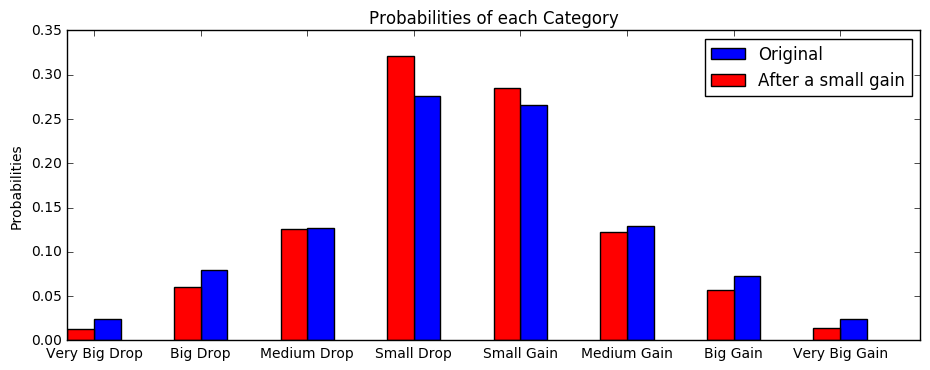

In [53]:
plot_probability_bar_graph('sg', sg_count, all_two_day_trends)

It looks like modest gains make it 5% more likely to be reversed the next day.

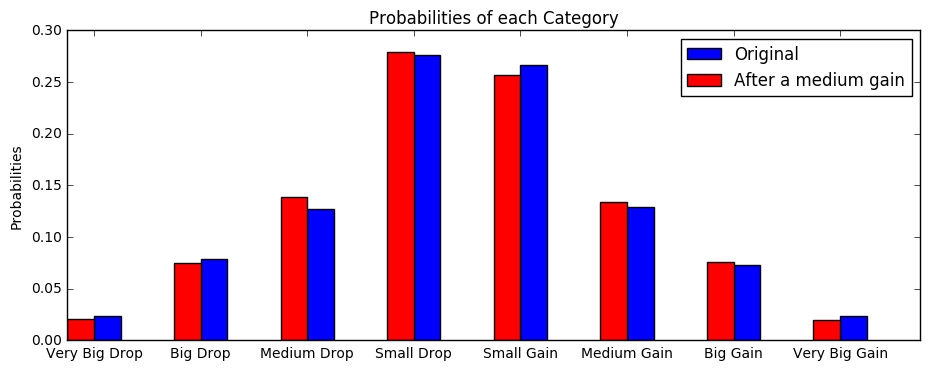

In [54]:
plot_probability_bar_graph('mg', mg_count, all_two_day_trends)

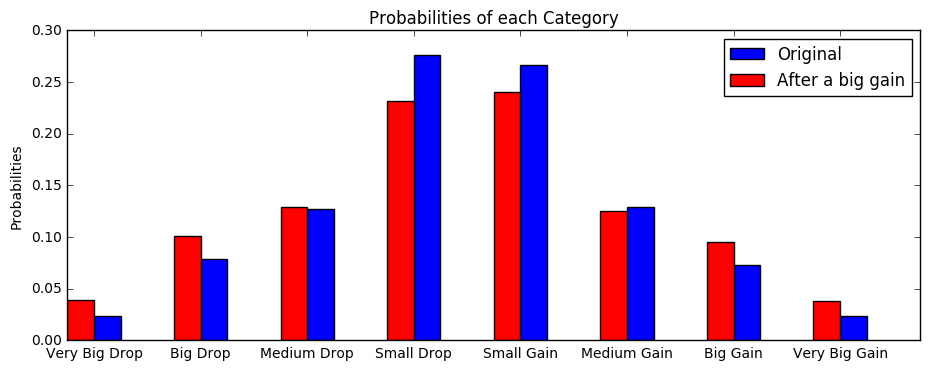

In [55]:
plot_probability_bar_graph('bg', bg_count, all_two_day_trends)

Suprisingly evenly distributed probabilities after a big gain...

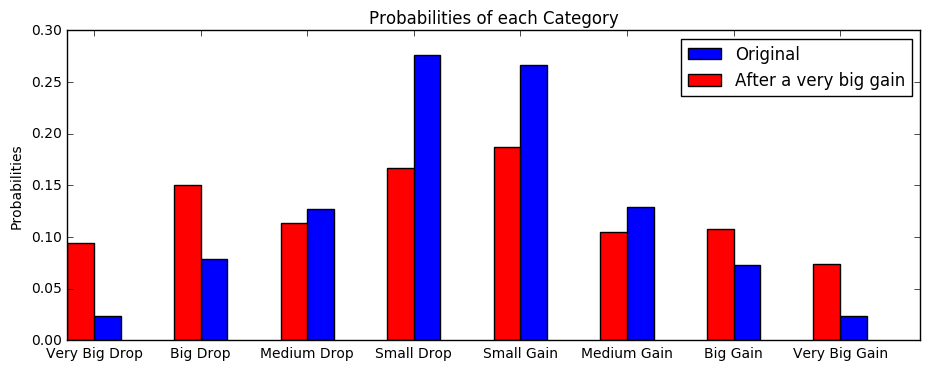

In [56]:
plot_probability_bar_graph('vbg', vbg_count, all_two_day_trends)

In conclusion, it seems that there is a momentum effect present, but there is also a "bounce back" effect as well, where extreme movements tend to raise the probability of an extreme movement in the other direction.

Also, very large movements in either direction are more likely to result in a loss the next day.